# Experiência 2

1.

a) 
Seja o sinal: $x(t) = sin(2\pi f_0t) + \frac{1}{3} sin(2\pi3f_0t)$ 

Usando a identidade de Euler, podemos expressar $x$ da seguinte forma:
    $$x(t) = \frac{e^{2\pi f_0t} - e^{-2\pi f_0t}}{2j} + \frac{e^{2\pi3f_0t} - e^{-2\pi 3f_0t}}{6j}$$
    $$x(t) =  -\frac{1}{6j} e^{-2\pi 3f_0t} - \frac{1}{2j}e^{-2\pi f_0t} +\frac{1}{2j}e^{2\pi f_0t} + \frac{1}{6j}e^{2\pi3f_0t}$$
Onde podemos extrair:
$$x_{-3} = -x_3 = \frac{e^{-\frac{1}{2}\pi}}{6} = \frac{-j}{6}$$
$$x_{-1} = -x_1 = \frac{e^{-\frac{1}{2}\pi}}{2}= \frac{-j}{2}$$

b) Usando a), podemos escrever a transformada $X(j\Omega)$:
$$X(j\Omega ) = -2\pi\frac{j}{6}\delta(\Omega + 2\pi 3f_0t ) - 2\pi \frac{j}{2}\delta(\Omega + 2\pi f_0t ) + 2\pi \frac{j}{2}\delta(\Omega - 2\pi f_0t ) + 2\pi \frac{j}{6}\delta(\Omega - 2\pi 3f_0t )$$

c) O sinal terá a seguinte forma:
$$x[n] = sin(2\pi f_0nT_a) + \frac{1}{3} sin(2\pi3f_0nT_a)$$

Text(0.5, 1.0, '$x(t)$ e $x[n]$')

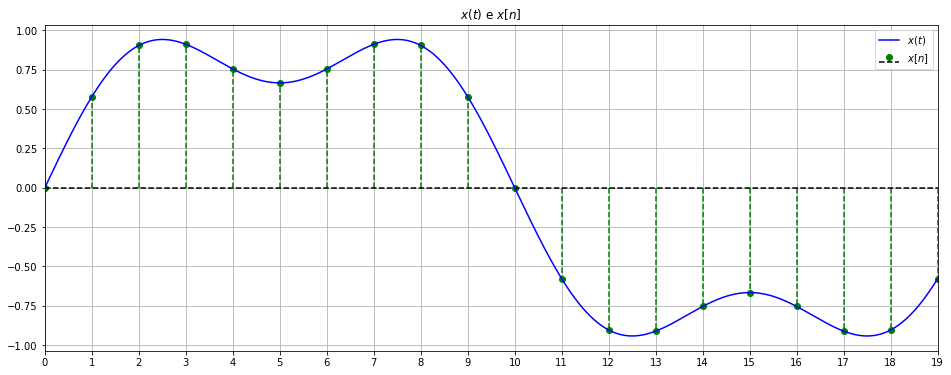

In [73]:
import numpy as np
import matplotlib.pyplot as plt
f0 = 500
Ta = 100e-6
f_continous = lambda n: np.sin(2*np.pi*t*f0) + 1/3*np.sin(2*np.pi*3*t*f0) 
f_discrete = lambda n: np.sin(2*np.pi*n*f0*Ta) + 1/3*np.sin(2*np.pi*3*n*f0*Ta)

n_final = int(1.9e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 1.9e-3, 1000)

fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.grid()
plt.title("$x(t)$ e $x[n]$")

d) Calculo da TDF $X[k]$:

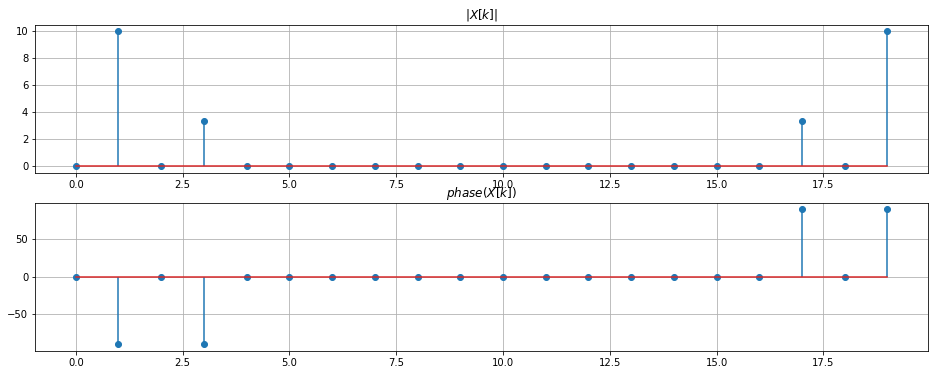

In [74]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(list(range(0,20)), np.abs(tdf_x))
ax[1].stem(list(range(0,20)), np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

e) A expressão da TFTD $X(e^{j\omega})$ é
    $$X(e^{j\omega}) =\frac{1}{T_a} \sum_{k=-\infty
   }^{\infty}X\left(j\left(\frac{\omega}{T_a}- k\frac{2\pi}{T_a}\right)\right)$$
   

$$X(e^{j\omega}) = \frac{1}{T_a}\sum_{k=-\infty}^{\infty}\left(-2\pi\frac{j}{6}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} + 2\pi 3f_0t ) - 2\pi \frac{j}{2}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} + 2\pi f_0t ) + 2\pi \frac{j}{2}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} - 2\pi f_0t ) + 2\pi \frac{j}{6}\delta(\frac{\omega}{T_a}- k\frac{2\pi}{T_a} - 2\pi 3f_0t )\right)$$

Usando as propriedades do Delta de Dirac:

$$X(e^{j\omega}) = \sum_{k=-\infty}^{\infty}\left(-\pi\frac{j}{3}\delta(\omega - k 2\pi + 2\pi 3f_0t \frac{1}{T_a}) - \pi j\delta(\omega - k 2\pi + 2\pi f_0t\frac{1}{T_a} ) + \pi j\delta(\omega - k 2\pi - 2\pi f_0t \frac{1}{T_a}) + \pi \frac{j}{3}\delta(\omega - k 2\pi  - 2\pi 3f_0t \frac{1}{T_a})\right)$$

f) Sabemos a seguinte relação entre a série de fourier de tempo discreto ($\tilde{X}(k)$) e a TFTD ($X(e^{j\omega})$)?

$$\tilde{X}(n) = X(e^{j\omega})|_{\frac{2\pi n }{N_0}}$$

Dos gráficos: 

$$x_{-1} = \frac{1}{20} X[1]$$
$$x_{-3} = \frac{1}{20} X[3]$$
$$x_{3} = \frac{1}{20} X[17]$$
$$x_{1} = \frac{1}{20} X[19]$$

g)

Text(0.5, 1.0, '$x(t)$ e $x[n]$')

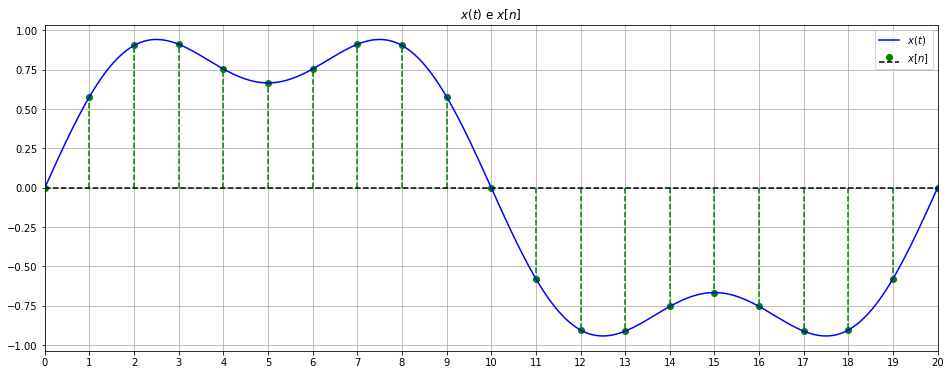

In [75]:
n_final = int(2e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 2e-3, 1000)


fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.grid()
plt.title("$x(t)$ e $x[n]$")

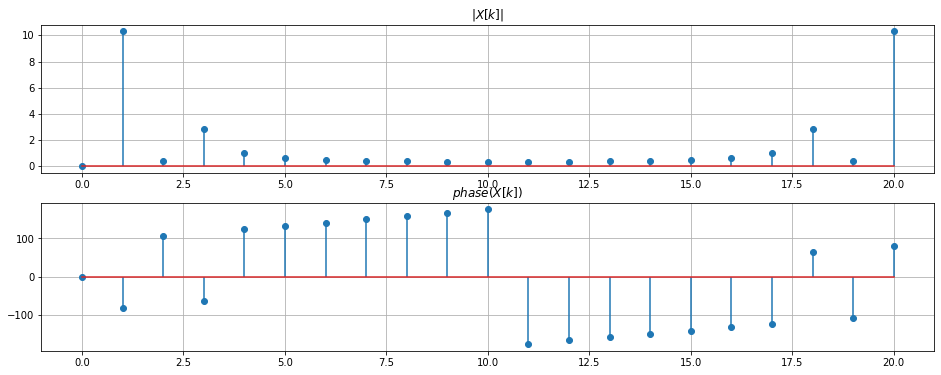

In [76]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(list(range(0,21)), np.abs(tdf_x))
ax[1].stem(list(range(0,21)), np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

Perceba que o espectro é bem distinto. Isso decorre do fato que a TDF considerará o periodo de 21 amostras e não 20. A próxima figura mostrará a diferença:

h)

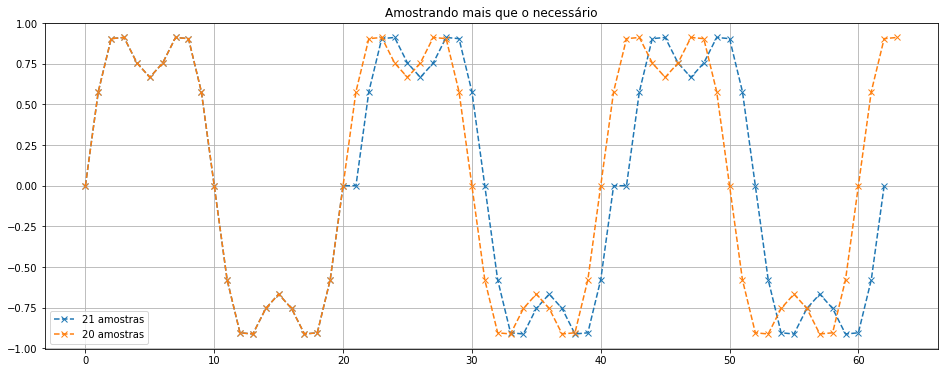

In [77]:
x_errado = np.concatenate((f_discrete(array_n),f_discrete(array_n), f_discrete(array_n)))
x_correto = f_discrete(np.array(list(range(0, 64))))
fig, ax = plt.subplots(figsize=(16,6))
plt.title("Amostrando mais que o necessário")
plt.grid()
plt.plot(x_errado, marker = 'x', linestyle = '--', label='21 amostras')
plt.plot(x_correto, marker = 'x', linestyle ='--', label ='20 amostras')
plt.legend()

Seja $P_{N_0+1}$ a janela retangular de largura $N_0 + 1 = 21$,
$$P_{N_0 +1}(e^{j\omega}) = \frac{sin\left(\omega\frac{(N_0 + 1)}{2}\right)}{sin\left(\omega\frac{1}{2}\right)} e^{-j\frac{\omega N_0}{2}}$$

A TDF será: 
$$X_{janelado}(e^{j\omega}) =\frac{1}{T_a} \sum_{k=-\infty
}^{\infty}X\left(j\left(\frac{\omega}{T_a}- k\frac{2\pi}{T_a}\right)\right)*\frac{sin\left(\omega\frac{(N_0 + 1)}{2}\right)}{sin\left(\omega\frac{1}{2}\right)} e^{-j\frac{\omega N_0}{2}}$$

Como a transformada de $X$ são impulsos, a convolução será uma soma de sincs, explicando a forma da TDF.


Text(0.5, 1.0, '$x(t)$ e $x[n]$')

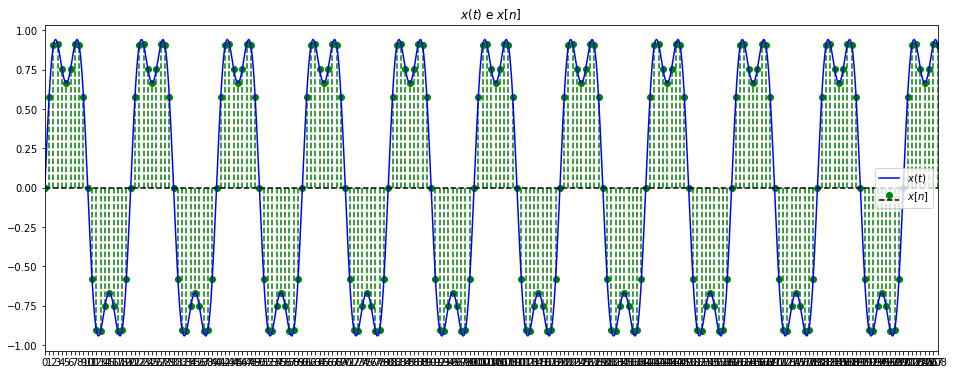

In [79]:
n_final = int(20.9e-3/Ta)
array_n = np.array(list(range(0, n_final+1)))
t = np.linspace(0, 20.9e-3, 1000)


fig, ax = plt.subplots(figsize = (16, 6))
ax.stem(array_n*Ta, f_discrete(array_n), linefmt='g--', label = '$x[n]$', markerfmt='g o', basefmt = 'k--')
ax.plot(t, f_continous(t), label='$x(t)$', color='b')
ax.set_xticks(array_n*Ta, array_n)
ax.set_xlim(0, (array_n*Ta)[-1])
plt.legend()
plt.title("$x(t)$ e $x[n]$")

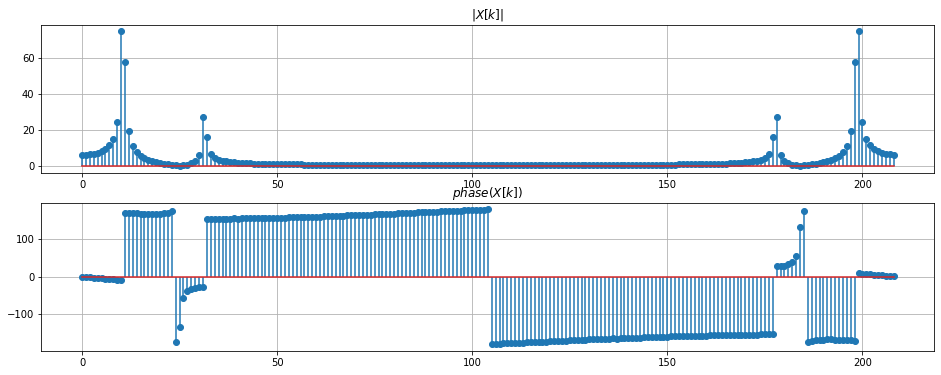

In [80]:
tdf_x = np.fft.fft(f_discrete(array_n))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_x))
ax[1].stem(np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

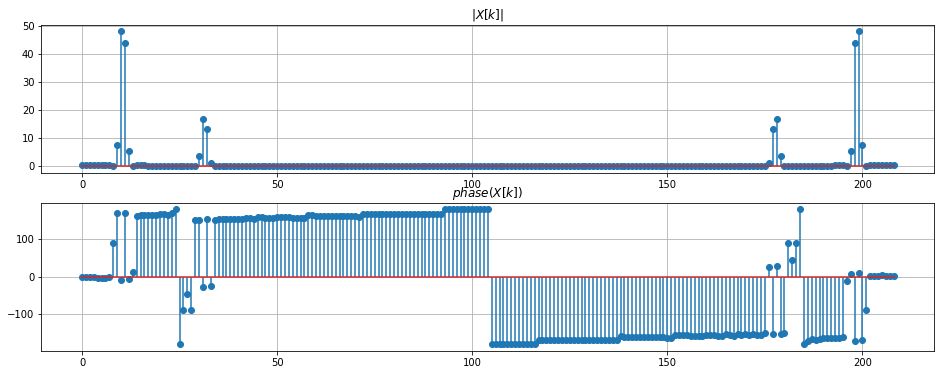

In [83]:
### Usando Hamming
tdf_x = np.fft.fft(f_discrete(array_n)*np.hamming(array_n.shape[0]))
tdf_x[np.isclose(tdf_x, 0)] = 0

fig, ax = plt.subplots(2,1, figsize = (16, 6))
ax[0].grid()
ax[0].stem(np.abs(tdf_x))
ax[1].stem(np.angle(np.round(tdf_x, 2))*180/np.pi)
ax[0].set_title("$|X[k]|$")
ax[1].set_title("$phase(X[k])$")
ax[1].grid()
plt.show()

## 2

In [85]:
pip install mat73

Note: you may need to restart the kernel to use updated packages.


In [86]:
import mat73
data_dict = mat73.loadmat('sinal.mat')
fa = 

In [87]:
data_dict

{'fa': array(10000, dtype=int64),
 'y': array([ 1.8       ,  1.70952269,  0.28754564, -1.42484809, -2.10512689,
        -1.17561765,  0.70531178,  2.10531303,  1.91288521,  0.22473401,
        -1.68667228, -2.33484069, -1.18121566,  0.91574412,  2.34005724,
         1.96932564,  0.06408379, -1.91321413, -2.42568156, -1.06266059,
         1.12940221,  2.45388353,  1.88357021, -0.13869551, -2.04561616,
        -2.36615503, -0.86566289,  1.28262665,  2.41983059,  1.68848877,
        -0.31913111, -2.0431545 , -2.1742467 , -0.65147789,  1.32347983,
         2.23987343,  1.43828681, -0.41731228, -1.8916522 , -1.89370744,
        -0.48424907,  1.22248877,  1.94453806,  1.19732231, -0.39027922,
        -1.60644776, -1.58505536, -0.41776104,  0.97877902,  1.58666096,
         1.02684334, -0.22093228, -1.22930955, -1.31314167, -0.48432165,
         0.62034028,  1.23057457,  0.9723688 ,  0.07836772, -0.81992889,
        -1.13383284, -0.68805593,  0.19836886,  0.93893821,  1.05430287,
         0.4